In [52]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<class 'numpy.ndarray'> 100


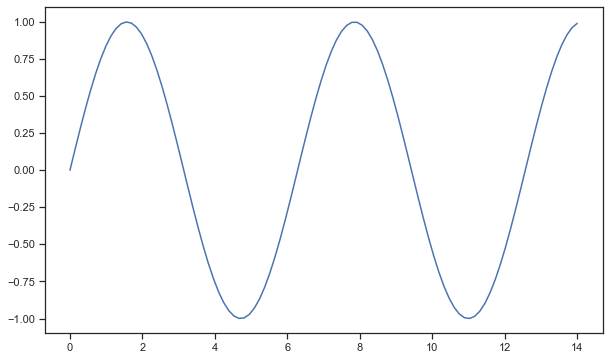

In [53]:
x = np.linspace(0, 14, 100)
print( type(x), len(x) )

y1 = np.sin(x)
y2 = 2*np.sin(x+0.5)
y3 = 4*np.sin(x+1.0)

plt.figure(figsize = (10, 6))   # 그림의 크기
plt.plot(x, y1)

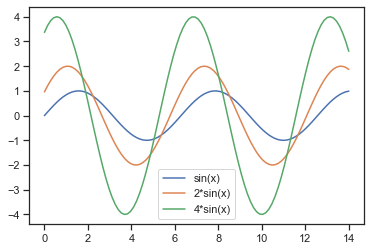

In [54]:
# plt.plot(x, y1, x, y2, x, y3)    #3개의 sin 그래프
plt.plot(x, y1, label = 'sin(x)')
plt.plot(x, y2, label = '2*sin(x)')
plt.plot(x, y3, label = '4*sin(x)')

plt.legend()

In [55]:
print(sns.__version__)

0.11.0


In [56]:
sns.set_style("whitegrid")

In [57]:
tips = sns.load_dataset(("tips"))   # 인터넷이 켜져 있어야 함.
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 실습 1-1
 * 2개 그래프 그려보기
    * 언제 쓰이는가와 확인한 점- 1줄 쓰기

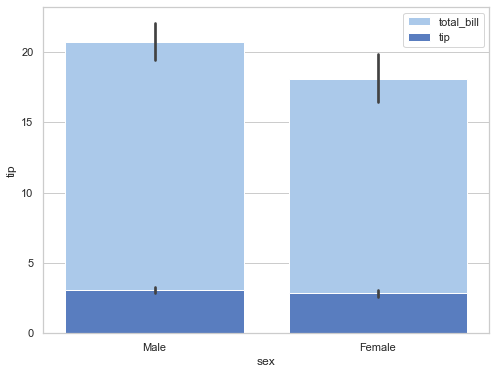

In [58]:
f, ax = plt.subplots(figsize=(8, 6))

sns.set_color_codes("pastel")
sns.barplot(x="sex", y="total_bill", data=tips,
            label="total_bill", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="sex", y="tip", data=tips,
            label="tip", color="b")

ax.legend()

C:\Users\ahw48\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


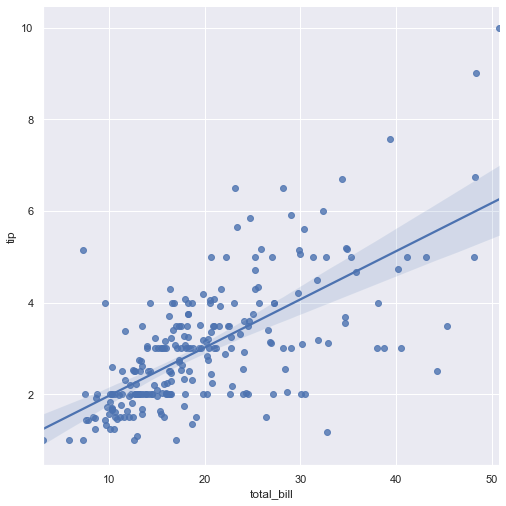

In [59]:
sns.set_style("darkgrid")
sns.lmplot(x="total_bill", y="tip", data=tips, size=7)
plt.show()

C:\Users\ahw48\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


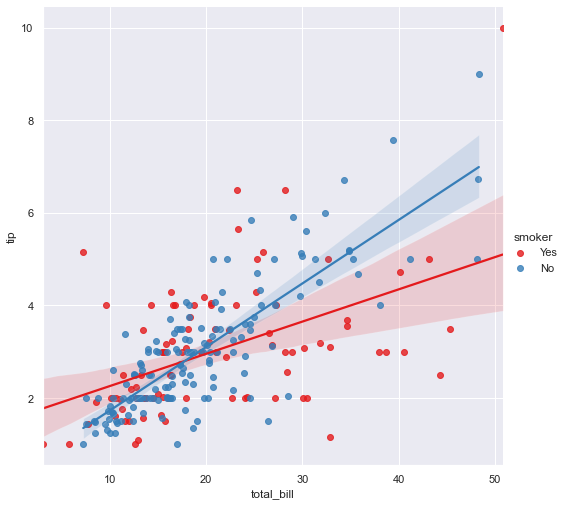

In [60]:
sns.lmplot(x="total_bill", y='tip', hue='smoker', data=tips, palette="Set1", size=7)

In [61]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [62]:
fg = sns.load_dataset('flights')
fg.head(5)
fg

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [63]:
fg = sns.load_dataset('flights')

# 01. 데이터 행과 열
# 02. 데이터 컬럼 확인(컬럼이룸, 컬럼 자료형)
# 03. 데이터 요약 ㅏㄱㅄ
# 04. 데이터 실제 확인

print( fg.shape    ) # 행과 열
print()
print( fg.columns  )# 컬럼명 확인
print()
print( fg.info()   )#행과열, 컬럼명, 자료형
print()
print( fg.dtypes   )# 컬럼의 자료형
print()
print(fg.describe()) # 수치형의 요약값

(144, 3)

Index(['year', 'month', 'passengers'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB
None

year             int64
month         category
passengers       int64
dtype: object

              year  passengers
count   144.000000  144.000000
mean   1954.500000  280.298611
std       3.464102  119.966317
min    1949.000000  104.000000
25%    1951.750000  180.000000
50%    1954.500000  265.500000
75%    1957.250000  360.500000
max    1960.000000  622.000000


In [64]:
type(fg)

pandas.core.frame.DataFrame

In [65]:
fgp = fg.pivot("month", "year", "passengers")
fgp                                               

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


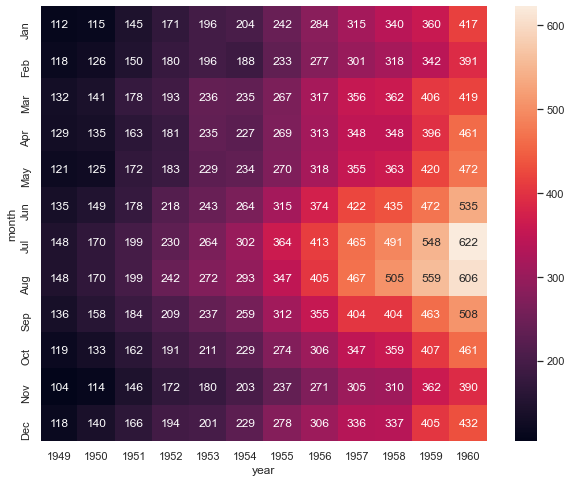

In [66]:
plt.figure(figsize=(10,8))
sns.heatmap(fgp,annot=True,fmt='d')
plt.show()

In [67]:
sns.heatmap(cor_tips, annot=True, fmt='f')

NameError: name 'cor_tips' is not defined

In [68]:
sns.set(style='ticks')
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [69]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [43]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [44]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [45]:
iris.shape

(150, 5)

In [46]:
iris.species.describe()

count            150
unique             3
top       versicolor
freq              50
Name: species, dtype: object

In [47]:
iris['species'].describe()

count            150
unique             3
top       versicolor
freq              50
Name: species, dtype: object

In [51]:
iris[iris.species=='setosa'].sepal_length.describe()

count    50.00000
mean      5.00600
std       0.35249
min       4.30000
25%       4.80000
50%       5.00000
75%       5.20000
max       5.80000
Name: sepal_length, dtype: float64

In [71]:
# 데이터 개수 확인
sns.countplot(  x='species', y='sepal_length', data=iris)

ValueError: Cannot pass values for both `x` and `y`

[]

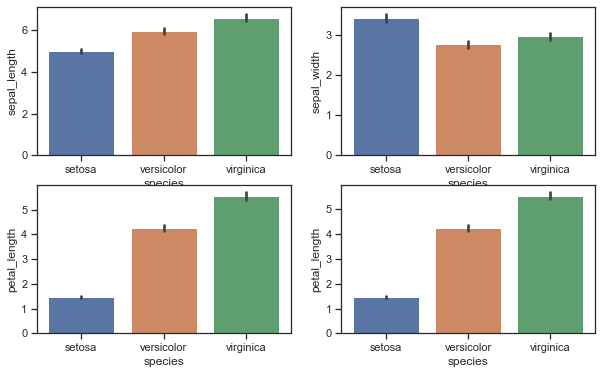